In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from os import listdir,rename

In [ ]:
#Do not run!
"""
#file_list = set(listdir("C:/Users/paul8/Documents/Uni/7. Thesis/Thesis/paul"))
db = pd.read_csv("C:/Users/paul8/Downloads/DB.csv",sep=";")
#file_list_db = set(db.File)
#len(file_list.intersection(file_list_db))
def make_date(s):
    s = str(s)
    if len(s) == 5:
        s = "0" + s
    return s[:2] + "/" + s[2:4] + "/20" + s[4:]
db["Invoice Date"] = db["Invoice Date"].map(make_date)
db["Amount"] = db["Amount"].map(lambda x:x.replace(",","."))
db["Invoice Number"] = db["Invoice Number"].map(str)
#db.to_csv("C:/Users/paul8/Downloads/DB.csv",sep=";",index=False)
"""    

In [2]:
db = pd.read_csv("C:/Users/paul8/Downloads/DB_update.csv",sep=";")
db["Amount"] = db["Amount"].map(str)
db["Invoice Number"] = db["Invoice Number"].map(str)
db.head()

,File,Vendor,Invoice Number,Amount,Invoice Date
0,AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020
1,ALU_RAHMEN_Rechnung_27112023.pdf,Alurahmen24,1164/11/2023,23.7,11/27/2023
2,Amazon_GaN_Charger_13102022.pdf,Amazon Services Europe S.à r.l.,DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022
3,Amazon_USB_Flash_Drive_24102022.pdf,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022
4,Aral_Center_Hildesheim_05032020.pdf,Aral Center Hildesheim,4605/009/00003,68.84,03/05/2020


In [3]:
data = pd.DataFrame(columns=["File","Extracted Vendor","Extracted Invoice Number","Extracted Amount","Extracted Invoice Date"])
folder = "./Results/"
files = listdir(folder)
print(len(files))
for file in files:
    #print(file)
    path = folder + file
    data_new = pd.read_csv(path, sep=';', header=None)
    data_new.columns = ["File","Extracted Vendor","Extracted Invoice Number","Extracted Amount","Extracted Invoice Date"]
    #print(data_new.dtypes)
    data = data._append(data_new,ignore_index=True)
data.head()

160


,File,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date
0,AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020 00:00:00
1,ALU_RAHMEN_Rechnung_27112023.pdf,NaN,1164/11/2023,23.70,11/27/2023 00:00:00
2,Amazon_GaN_Charger_13102022.pdf,"Amazon Services Europe S.à r.l.,",DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022 00:00:00
3,Amazon_USB_Flash_Drive_24102022.pdf,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022 00:00:00
4,Aral_Center_Hildesheim_05032020.pdf,Aral- CENTER,,68.84,03/05/2020 00:00:00


In [4]:
data["Extracted Invoice Date"] = data["Extracted Invoice Date"].map(lambda x:x.split(" ")[0],na_action="ignore")
data["Extracted Invoice Number"] = data["Extracted Invoice Number"].map(lambda x: "nan" if str(x) == "" else str(x).strip()).map(lambda x: "nan" if str(x) == "" else str(x).strip())
data["Extracted Amount"] = data["Extracted Amount"].map(str)
data["Extracted Vendor"] = data["Extracted Vendor"].map(str)

data.head()


,File,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date
0,AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020
1,ALU_RAHMEN_Rechnung_27112023.pdf,nan,1164/11/2023,23.7,11/27/2023
2,Amazon_GaN_Charger_13102022.pdf,"Amazon Services Europe S.à r.l.,",DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022
3,Amazon_USB_Flash_Drive_24102022.pdf,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022
4,Aral_Center_Hildesheim_05032020.pdf,Aral- CENTER,nan,68.84,03/05/2020


In [5]:
results = data.set_index("File").join(db.set_index("File"),how="inner")
results

,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date,Vendor,Invoice Number,Amount,Invoice Date
File,,,,,,,,
AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020
ALU_RAHMEN_Rechnung_27112023.pdf,nan,1164/11/2023,23.7,11/27/2023,Alurahmen24,1164/11/2023,23.7,11/27/2023
Amazon_GaN_Charger_13102022.pdf,"Amazon Services Europe S.à r.l.,",DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022,Amazon Services Europe S.à r.l.,DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022
Amazon_USB_Flash_Drive_24102022.pdf,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022
Aral_Center_Hildesheim_05032020.pdf,Aral- CENTER,nan,68.84,03/05/2020,Aral Center Hildesheim,4605/009/00003,68.84,03/05/2020
...,...,...,...,...,...,...,...,...
Zollamt_Schaffhausen_Vignette_20022020.pdf,Scnwerzensche Fidgenossenschett Schweiz Confed...,nan,40.0,02/20/2020,Schweizerische Eidgenossenschaft,07937/80831371,40.0,02/20/2020
Zollamt_St_Margarethen_Vignette_CH_2023_14072023.pdf,Schweizerische Eidgenossenschaft,nan,40.0,07/14/2023,Schweizerische Eidgenossenschaft,nan,40.0,07/14/2023
Zoll_Schaffhausen_Vignette_2024.pdf,Schweizerische Eldgenossenschaft Conféderation,nan,nan,03/19/2024,Schweizerische Eidgenossenschaft,nan,40.0,03/19/2024


In [6]:
results["Correct Vendor"] = results["Extracted Vendor"] == results["Vendor"] 
for file,ext_ven,ven in zip(results.index, results["Extracted Vendor"], results["Vendor"]):
    results.loc[file,"Correct Vendor"] = ext_ven in ven or ven in ext_ven
results["Correct Invoice Number"] = results["Extracted Invoice Number"] == results["Invoice Number"]
results["Correct Amount"] = results["Extracted Amount"] == results["Amount"]
results["Correct Invoice Date"] = results["Extracted Invoice Date"] == results["Invoice Date"]
results["Quota"] = results["Correct Vendor"].map(int) + results["Correct Invoice Number"].map(int) + results["Correct Amount"].map(int) + results["Correct Invoice Date"].map(int)


In [17]:
results.Quota.describe()

count    160.000000
mean       3.256250
std        0.818396
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Quota, dtype: float64

(array([ 5., 23., 58., 74.]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

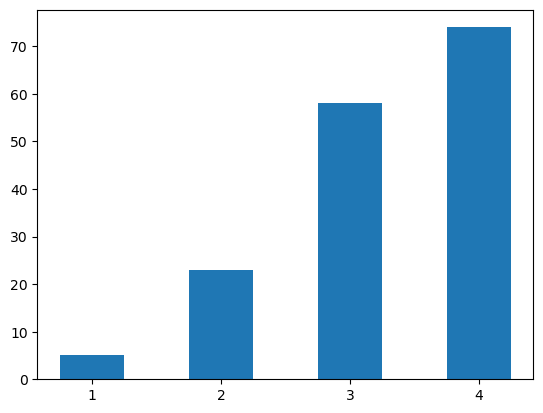

In [7]:
plt.xticks(range(1,5))
plt.hist(results.Quota,bins=[1,2,3,4,5],align="left",rwidth=0.5)

(array([160., 155., 132.,  74.]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

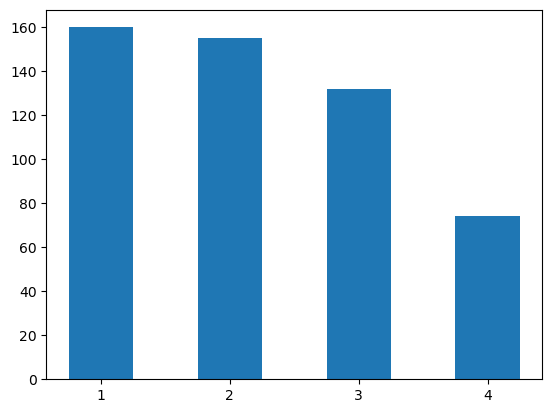

In [8]:
plt.xticks(range(1,5))
plt.hist(results.Quota,bins=[1,2,3,4,5],cumulative=-1,align="left",rwidth=0.5)
#plt.hist([1,2,3,4,1,3,1,1,2,4,3,4,2,4,2,1,4],bins=[0.75+0.5*i for i in range(8)])

In [52]:
n = len(results.index)
vendor_acc = (results["Correct Vendor"].sum() / n) * 100
number_acc = (results["Correct Invoice Number"].sum() / n) * 100
amount_acc = (results["Correct Amount"].sum() / n) * 100
date_acc = (results["Correct Invoice Date"].sum() / n) * 100
print(f"Vendor Accuracy: {vendor_acc} %")
print(f"Invoice Number Accuracy: {number_acc} %")
print(f"Amount Accuracy: {amount_acc} %")
print(f"Invoice Date Accuracy: {date_acc} %")

Vendor Accuracy: 81.875 %
Invoice Number Accuracy: 70.625 %
Amount Accuracy: 86.25 %
Invoice Date Accuracy: 86.875 %


In [53]:
n = len(results.index)
vendor_nan = results.loc[results["Correct Vendor"]==False,"Extracted Vendor"].value_counts().get("nan",0)
number_nan = results.loc[results["Correct Invoice Number"]==False,"Extracted Invoice Number"].value_counts().get("nan",0)
amount_nan = results.loc[results["Correct Amount"]==False,"Extracted Amount"].value_counts().get("nan",0)
date_nan = results["Extracted Invoice Date"].isna().sum()
vendor_acc = (results["Correct Vendor"].sum() / (n-vendor_nan)) * 100
number_acc = (results["Correct Invoice Number"].sum() / (n-number_nan)) * 100
amount_acc = (results["Correct Amount"].sum() / (n-amount_nan)) * 100
date_acc = (results["Correct Invoice Date"].sum() / (n-date_nan)) * 100
print(f"Vendor Null: {(vendor_nan/n)*100:.2f} %")
print(f"Invoice Number Null: {(number_nan/n)*100:.2f} %")
print(f"Amount Null: {(amount_nan/n)*100:.2f} %")
print(f"Invoice Date Null: {(date_nan/n)*100:.2f} %")
print(f"Vendor Accuracy (excluding Null): {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy (excluding Null): {number_acc:.2f} %")
print(f"Amount Accuracy (excluding Null): {amount_acc:.2f} %")
print(f"Invoice Date Accuracy (excluding Null): {date_acc:.2f} %")

Vendor Null: 6.25 %
Invoice Number Null: 26.25 %
Amount Null: 11.25 %
Invoice Date Null: 10.62 %
Vendor Accuracy (excluding Null): 87.33 %
Invoice Number Accuracy (excluding Null): 95.76 %
Amount Accuracy (excluding Null): 97.18 %
Invoice Date Accuracy (excluding Null): 97.20 %


In [54]:
inv = results.loc[results["Correct Amount"] == False,["Extracted Amount","Amount"]]
inv = results.loc[results["Correct Invoice Number"] == False,["Extracted Invoice Number","Invoice Number"]]
inv = results.loc[results["Correct Vendor"] == False,["Extracted Vendor","Vendor"]]
#inv = results.loc[results["Correct Invoice Date"] == False,["Extracted Invoice Date","Invoice Date"]]

inv

,Extracted Vendor,Vendor
File,,
ALU_RAHMEN_Rechnung_27112023.pdf,nan,Alurahmen24
Aral_Center_Hildesheim_05032020.pdf,Aral- CENTER,Aral Center Hildesheim
ASFiNAG_Maut_Bosruck_24092024.pdf,AISIFIiINIAIG,ASFiNAG
BFT_Tanken_05072024.pdf,nan,Autohaus Kienzler GmbH BFT Tankstelle
ENI_Tankstelle_Vomp_18092024.pdf,nan,GUTMANN Gmbh ENI Tankstelle
ESSO_Tankstelle_Markdorf_27092024.pdf,ESSO STATTON,ESSO STATION Markdorf
Gasthaus_Zum_Brend_11042024.pdf,Berggasthof B r e n ☐ d,Berggasthof Brend
Hotel_Christl_Rohrdorf_A8_11092020.pdf,Hotel Christe,Hotel Christl
Hotel_Kreuz_Stempfle_Zipplingen_21082021.pdf,"Stemplle's ,,Stempfle's"" Landgasthof zum",Hotel Kreuz Stempfle Zipplingen


In [8]:
scan = pd.read_csv("C:/Users/paul8/Downloads/DB_scan.csv",sep=';').set_index("File")

res_pdf = results.loc[scan["Scan"] == False,:]
res_scan = results.loc[scan["Scan"] == True,:]

(array([[ 5., 15., 32., 28.],
        [ 0.,  8., 26., 46.]]),
 array([1., 2., 3., 4., 5.]),
 <a list of 2 BarContainer objects>)

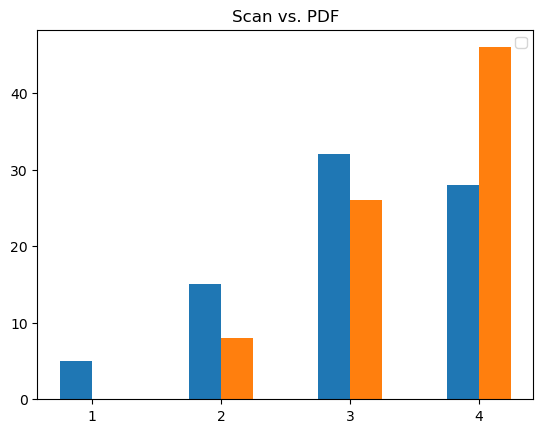

In [11]:
plt.title("Scan vs. PDF")
plt.xticks(range(1,5))
plt.legend(["Scan","PDF"])
plt.hist([res_scan.Quota,res_pdf.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5)
#plt.show()

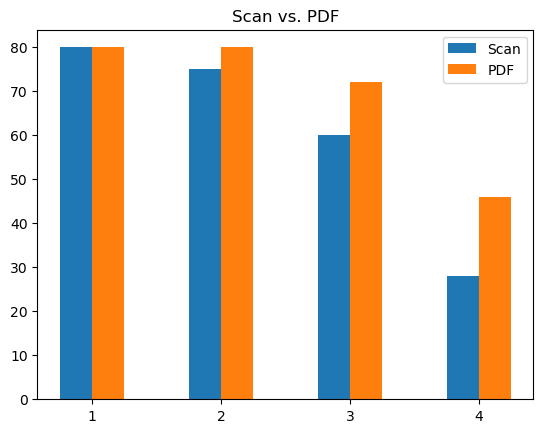

In [19]:
plt.title("Scan vs. PDF")
plt.xticks(range(1,5))
plt.hist([res_scan.Quota,res_pdf.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5,cumulative=-1)
plt.legend(["Scan","PDF"])
plt.show()

In [82]:
n = res_pdf.shape[0]
vendor_acc = (res_pdf["Correct Vendor"].sum() / n) * 100
number_acc = (res_pdf["Correct Invoice Number"].sum() / n) * 100
amount_acc = (res_pdf["Correct Amount"].sum() / n) * 100
date_acc = (res_pdf["Correct Invoice Date"].sum() / n) * 100
print("PDF Accuracy:")
print(f"Vendor Accuracy: {vendor_acc} %")
print(f"Invoice Number Accuracy: {number_acc} %")
print(f"Amount Accuracy: {amount_acc} %")
print(f"Invoice Date Accuracy: {date_acc} %")
n = res_scan.shape[0]
vendor_acc = (res_scan["Correct Vendor"].sum() / n) * 100
number_acc = (res_scan["Correct Invoice Number"].sum() / n) * 100
amount_acc = (res_scan["Correct Amount"].sum() / n) * 100
date_acc = (res_scan["Correct Invoice Date"].sum() / n) * 100
print("Scan Accuracy:")
print(f"Vendor Accuracy: {vendor_acc} %")
print(f"Invoice Number Accuracy: {number_acc:.2f} %")
print(f"Amount Accuracy: {amount_acc} %")
print(f"Invoice Date Accuracy: {date_acc} %")

PDF Accuracy:
Vendor Accuracy: 92.5 %
Invoice Number Accuracy: 86.25 %
Amount Accuracy: 83.75 %
Invoice Date Accuracy: 85.0 %
Scan Accuracy:
Vendor Accuracy: 71.25 %
Invoice Number Accuracy: 55.00 %
Amount Accuracy: 88.75 %
Invoice Date Accuracy: 88.75 %


In [83]:
n = res_pdf.shape[0]
vendor_nan = res_pdf.loc[res_pdf["Correct Vendor"]==False,"Extracted Vendor"].value_counts().get("nan",0)
number_nan = res_pdf.loc[res_pdf["Correct Invoice Number"]==False,"Extracted Invoice Number"].value_counts().get("nan",0)
amount_nan = res_pdf.loc[res_pdf["Correct Amount"]==False,"Extracted Amount"].value_counts().get("nan",0)
date_nan = res_pdf["Extracted Invoice Date"].isna().sum() 
vendor_acc = (res_pdf["Correct Vendor"].sum() / (n-vendor_nan)) * 100
number_acc = (res_pdf["Correct Invoice Number"].sum() / (n-number_nan)) * 100
amount_acc = (res_pdf["Correct Amount"].sum() / (n-amount_nan)) * 100
date_acc = (res_pdf["Correct Invoice Date"].sum() / (n-date_nan)) * 100
print("On PDF")
print(f"Vendor Null: {(vendor_nan/n)*100:.2f} %")
print(f"Invoice Number Null: {(number_nan/n)*100:.2f} %")
print(f"Amount Null: {(amount_nan/n)*100:.2f} %")
print(f"Invoice Date Null: {(date_nan/n)*100:.2f} %")
print(f"Vendor Accuracy (excluding Null): {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy (excluding Null): {number_acc:.2f} %")
print(f"Amount Accuracy (excluding Null): {amount_acc:.2f} %")
print(f"Invoice Date Accuracy (excluding Null): {date_acc:.2f} %")

On PDF
Vendor Null: 5.00 %
Invoice Number Null: 10.00 %
Amount Null: 13.75 %
Invoice Date Null: 11.25 %
Vendor Accuracy (excluding Null): 97.37 %
Invoice Number Accuracy (excluding Null): 95.83 %
Amount Accuracy (excluding Null): 97.10 %
Invoice Date Accuracy (excluding Null): 95.77 %


In [84]:
n = res_scan.shape[0]
vendor_nan = res_scan.loc[res_scan["Correct Vendor"]==False,"Extracted Vendor"].value_counts().get("nan",0)
number_nan = res_scan.loc[res_scan["Correct Invoice Number"]==False,"Extracted Invoice Number"].value_counts().get("nan",0)
amount_nan = res_scan.loc[res_scan["Correct Amount"]==False,"Extracted Amount"].value_counts().get("nan",0)
date_nan = res_scan["Extracted Invoice Date"].isna().sum() 
vendor_acc = (res_scan["Correct Vendor"].sum() / (n-vendor_nan)) * 100
number_acc = (res_scan["Correct Invoice Number"].sum() / (n-number_nan)) * 100
amount_acc = (res_scan["Correct Amount"].sum() / (n-amount_nan)) * 100
date_acc = (res_scan["Correct Invoice Date"].sum() / (n-date_nan)) * 100
print("On Scan")
print(f"Vendor Null: {(vendor_nan/n)*100:.2f} %")
print(f"Invoice Number Null: {(number_nan/n)*100:.2f} %")
print(f"Amount Null: {(amount_nan/n)*100:.2f} %")
print(f"Invoice Date Null: {(date_nan/n)*100:.2f} %")
print(f"Vendor Accuracy (excluding Null): {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy (excluding Null): {number_acc:.2f} %")
print(f"Amount Accuracy (excluding Null): {amount_acc:.2f} %")
print(f"Invoice Date Accuracy (excluding Null): {date_acc:.2f} %")

On Scan
Vendor Null: 7.50 %
Invoice Number Null: 42.50 %
Amount Null: 8.75 %
Invoice Date Null: 10.00 %
Vendor Accuracy (excluding Null): 77.03 %
Invoice Number Accuracy (excluding Null): 95.65 %
Amount Accuracy (excluding Null): 97.26 %
Invoice Date Accuracy (excluding Null): 98.61 %


In [85]:
pdf_train, pdf_test = train_test_split(scan.loc[scan["Scan"] == False,:],test_size=5/16,random_state=42)
scan_train, scan_test = train_test_split(scan.loc[scan["Scan"] == True,:],test_size=5/16,random_state=42)

train_set = pdf_train._append(scan_train)
test_set = pdf_test._append(scan_test)

In [7]:
test_set = np.array(listdir("C:/Users/paul8/Documents/Uni/7. Thesis/Thesis/paul/"))
benchmark = results.loc[test_set,:]
benchmark.shape

(50, 13)

(array([ 3.,  0.,  4.,  0., 19.,  0., 24.]),
 array([0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25]),
 <BarContainer object of 7 artists>)

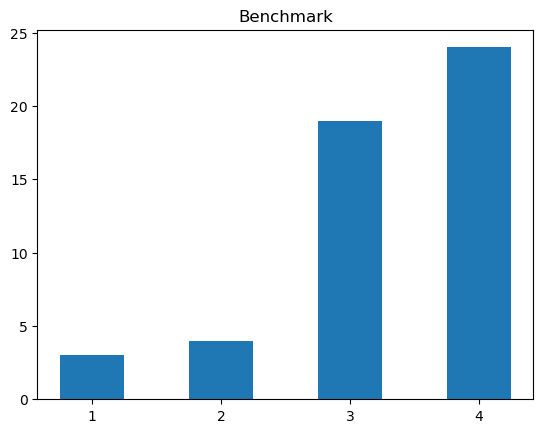

In [87]:
plt.xticks(range(1,5))
plt.title("Benchmark")
plt.hist(benchmark.Quota,bins=[0.75+0.5*i for i in range(8)])

In [88]:
n = len(benchmark.index)
vendor_acc = (benchmark["Correct Vendor"].sum() / n) * 100
number_acc = (benchmark["Correct Invoice Number"].sum() / n) * 100
amount_acc = (benchmark["Correct Amount"].sum() / n) * 100
date_acc = (benchmark["Correct Invoice Date"].sum() / n) * 100
print(f"Benchmark Vendor Accuracy: {vendor_acc} %")
print(f"Benchmark Invoice Number Accuracy: {number_acc} %")
print(f"Benchmark Amount Accuracy: {amount_acc} %")
print(f"Benchmark Invoice Date Accuracy: {date_acc} %")

Benchmark Vendor Accuracy: 76.0 %
Benchmark Invoice Number Accuracy: 78.0 %
Benchmark Amount Accuracy: 90.0 %
Benchmark Invoice Date Accuracy: 84.0 %


In [89]:
benchmark_pdf = benchmark.loc[scan["Scan"] == False,:]
benchmark_scan = benchmark.loc[scan["Scan"] == True,:]

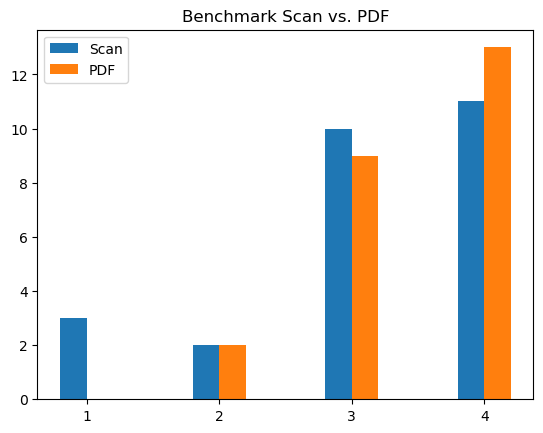

In [90]:
plt.title("Benchmark Scan vs. PDF")
plt.xticks(range(1,5))
plt.hist([benchmark_scan.Quota,benchmark_pdf.Quota],bins=[0.75+0.5*i for i in range(8)])
plt.legend(["Scan","PDF"])
plt.show()

*Start Test Results*


In [8]:
test_data = pd.DataFrame(columns=["File","Extracted Vendor","Extracted Invoice Number","Extracted Amount","Extracted Invoice Date"])
folder = "./Test_Results/"
files = listdir(folder)
print(len(files))
for file in files:
    #print(file)
    path = folder + file
    test_data_new = pd.read_csv(path, sep=';', header=None)
    test_data_new.columns = ["File","Extracted Vendor","Extracted Invoice Number","Extracted Amount","Extracted Invoice Date"]
    #print(data_new.dtypes)
    test_data = test_data._append(test_data_new,ignore_index=True)
test_data.head()

50


,File,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date
0,AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020 00:00:00
1,ALU_RAHMEN_Rechnung_27112023.pdf,NaN,1164/11/2023,23.70,NaN
2,ASFiNAG_Maut_Bosruck_24092024.pdf,AISIFIiINIAIG,60510300377039,6.50,09/24/2024 00:00:00
3,Autohaus_Siedle_Reifenwechsel_Einlagerung_2311...,Autohaus Siedle GmbH & Co. KG,110033602,84.80,11/23/2021 00:00:00
4,Autohaus_Siedle_Räder_wechseln_18112022.pdf,Autohaus Siedle GmbH & Co. KG,110038956,84.80,11/18/2022 00:00:00


In [9]:
test_data["Extracted Invoice Date"] = test_data["Extracted Invoice Date"].map(lambda x:x.split(" ")[0],na_action="ignore")
test_data["Extracted Invoice Number"] = test_data["Extracted Invoice Number"].map(lambda x: "nan" if str(x) == "" else str(x).strip()).map(lambda x: "nan" if str(x) == "" else str(x).strip())
test_data["Extracted Amount"] = test_data["Extracted Amount"].map(str)
test_data["Extracted Vendor"] = test_data["Extracted Vendor"].map(str)

test_data.head()

,File,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date
0,AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020
1,ALU_RAHMEN_Rechnung_27112023.pdf,nan,1164/11/2023,23.7,NaN
2,ASFiNAG_Maut_Bosruck_24092024.pdf,AISIFIiINIAIG,60510300377039,6.5,09/24/2024
3,Autohaus_Siedle_Reifenwechsel_Einlagerung_2311...,Autohaus Siedle GmbH & Co. KG,110033602,84.8,11/23/2021
4,Autohaus_Siedle_Räder_wechseln_18112022.pdf,Autohaus Siedle GmbH & Co. KG,110038956,84.8,11/18/2022


In [10]:
test_results = test_data.set_index("File").join(db.set_index("File"),how="inner")
test_results.head()

,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date,Vendor,Invoice Number,Amount,Invoice Date
File,,,,,,,,
AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020
ALU_RAHMEN_Rechnung_27112023.pdf,nan,1164/11/2023,23.7,NaN,Alurahmen24,1164/11/2023,23.7,11/27/2023
ASFiNAG_Maut_Bosruck_24092024.pdf,AISIFIiINIAIG,60510300377039,6.5,09/24/2024,ASFiNAG,60510300377039,6.5,09/24/2024
Autohaus_Siedle_Reifenwechsel_Einlagerung_23112021.pdf,Autohaus Siedle GmbH & Co. KG,110033602,84.8,11/23/2021,Autohaus Siedle GmbH & Co. KG,110033602,84.8,11/23/2021
Autohaus_Siedle_Räder_wechseln_18112022.pdf,Autohaus Siedle GmbH & Co. KG,110038956,84.8,11/18/2022,Autohaus Siedle GmbH & Co. KG,110038956,84.8,11/18/2022


In [11]:
test_results["Correct Vendor"] = test_results["Extracted Vendor"] == test_results["Vendor"] 
for file,ext_ven,ven in zip(test_results.index, test_results["Extracted Vendor"], test_results["Vendor"]):
    test_results.loc[file,"Correct Vendor"] = ext_ven in ven or ven in ext_ven
test_results["Correct Invoice Number"] = test_results["Extracted Invoice Number"] == test_results["Invoice Number"]
test_results["Correct Amount"] = test_results["Extracted Amount"] == test_results["Amount"]
test_results["Correct Invoice Date"] = test_results["Extracted Invoice Date"] == test_results["Invoice Date"]
test_results["Quota"] = test_results["Correct Vendor"].map(int) + test_results["Correct Invoice Number"].map(int) + test_results["Correct Amount"].map(int) + test_results["Correct Invoice Date"].map(int)

(array([ 1.,  8., 10., 31.]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

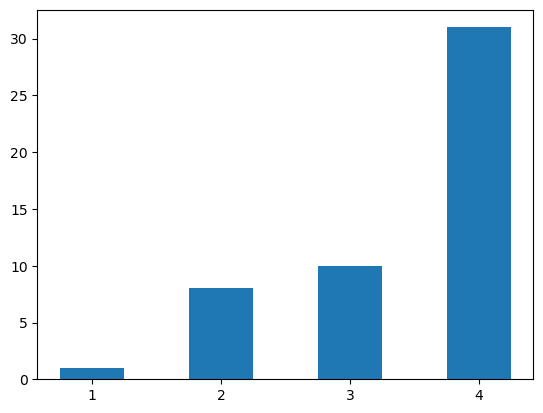

In [12]:
plt.xticks(range(1,5))
plt.hist(test_results.Quota,bins=[1,2,3,4,5],align="left",rwidth=0.5)

(array([50., 49., 41., 31.]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

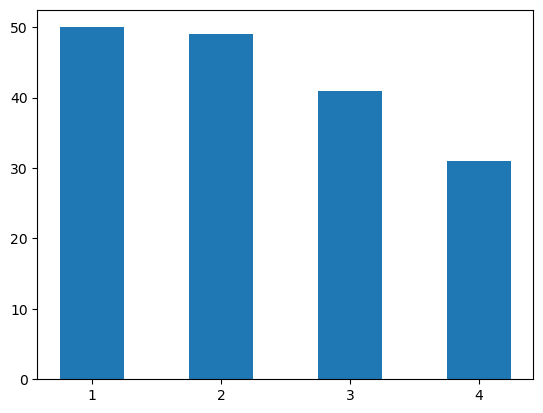

In [13]:
plt.xticks(range(1,5))
plt.hist(test_results.Quota,bins=[1,2,3,4,5],align="left",rwidth=0.5,cumulative=-1)

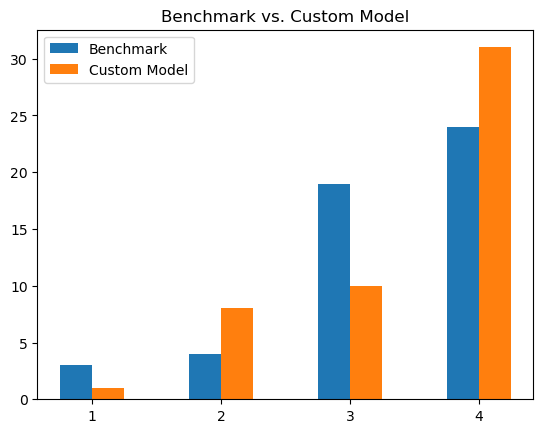

In [24]:
plt.title("Benchmark vs. Custom Model")
plt.xticks(range(1,5))
plt.hist([benchmark.Quota,test_results.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5)
plt.legend(["Benchmark","Custom Model"])
plt.show()

In [ ]:
np.array([[ 3.,  4., 19., 24.],
        [ 1.,  8., 10., 31.]])

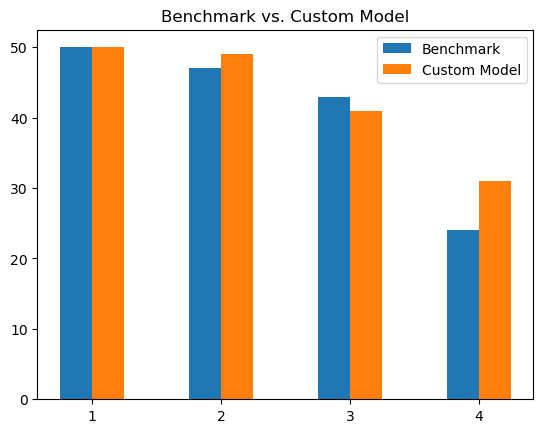

In [25]:
plt.title("Benchmark vs. Custom Model")
plt.xticks(range(1,5))
plt.hist([benchmark.Quota,test_results.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5,cumulative=-1)
plt.legend(["Benchmark","Custom Model"])
plt.show()

In [ ]:
np.array([[50., 47., 43., 24.],
        [50., 49., 41., 31.]])

In [100]:
n = len(test_results.index)
vendor_acc = (test_results["Correct Vendor"].sum() / n) * 100
number_acc = (test_results["Correct Invoice Number"].sum() / n) * 100
amount_acc = (test_results["Correct Amount"].sum() / n) * 100
date_acc = (test_results["Correct Invoice Date"].sum() / n) * 100
print(f"Model Vendor Accuracy: {vendor_acc} %")
print(f"Model Invoice Number Accuracy: {number_acc} %")
print(f"Model Amount Accuracy: {amount_acc} %")
print(f"Model Invoice Date Accuracy: {date_acc} %")

Model Vendor Accuracy: 76.0 %
Model Invoice Number Accuracy: 88.0 %
Model Amount Accuracy: 88.0 %
Model Invoice Date Accuracy: 90.0 %


In [101]:
n = len(benchmark.index)
vendor_acc = (benchmark["Correct Vendor"].sum() / n) * 100
number_acc = (benchmark["Correct Invoice Number"].sum() / n) * 100
amount_acc = (benchmark["Correct Amount"].sum() / n) * 100
date_acc = (benchmark["Correct Invoice Date"].sum() / n) * 100
print(f"Benchmark Vendor Accuracy: {vendor_acc} %")
print(f"Benchmark Invoice Number Accuracy: {number_acc} %")
print(f"Benchmark Amount Accuracy: {amount_acc} %")
print(f"Benchmark Invoice Date Accuracy: {date_acc} %")

Benchmark Vendor Accuracy: 76.0 %
Benchmark Invoice Number Accuracy: 78.0 %
Benchmark Amount Accuracy: 90.0 %
Benchmark Invoice Date Accuracy: 84.0 %


In [102]:
inv = test_results.loc[test_results["Correct Amount"] == False,["Extracted Amount","Amount"]]
inv = test_results.loc[test_results["Correct Invoice Number"] == False,["Extracted Invoice Number","Invoice Number"]]
inv = test_results.loc[test_results["Correct Vendor"] == False,["Extracted Vendor","Vendor"]]
#inv = test_results.loc[test_results["Correct Invoice Date"] == False,["Extracted Invoice Date","Invoice Date"]]

inv

,Extracted Vendor,Vendor
File,,
ALU_RAHMEN_Rechnung_27112023.pdf,nan,Alurahmen24
ASFiNAG_Maut_Bosruck_24092024.pdf,AISIFIiINIAIG,ASFiNAG
Bahn_Köln_Koblenz_26092022.pdf,nan,DB
ENI_Tankstelle_Vomp_18092024.pdf,GUTMANN GMBH,GUTMANN Gmbh ENI Tankstelle
Hotel_Kreuz_Stempfle_Zipplingen_21082021.pdf,"Stemplle's ,,Stempfle's""",Hotel Kreuz Stempfle Zipplingen
Hotel_Turnerwirt_08092020.pdf,TURNERWIRT GmbH.,"Hotel Turnerwirt, AT"
Maut_Karawankentunnel_10092020.pdf,Karawarben,DARS
Norton_Receipt_AP1530580409_25052024.pdf,norton,NortonLifeLock Ireland Limited
Total_Station_ARTERN_Tankbeleg_28042020.pdf,nan,Total Station Artern


In [103]:
test_results_pdf = test_results.loc[scan["Scan"] == False,:]
test_results_scan = test_results.loc[scan["Scan"] == True,:]

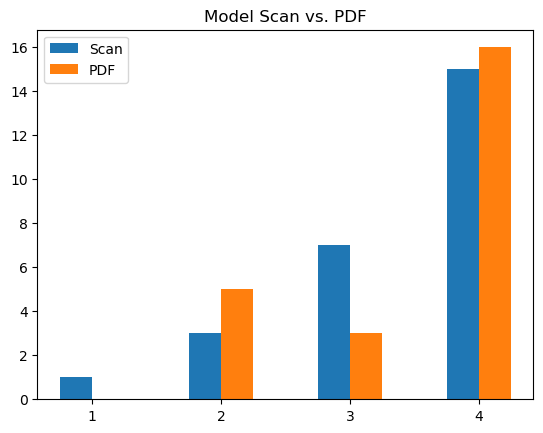

In [104]:
plt.title("Model Scan vs. PDF")
plt.xticks(range(1,5))
plt.hist([test_results_scan.Quota,test_results_pdf.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5)
plt.legend(["Scan","PDF"])
plt.show()

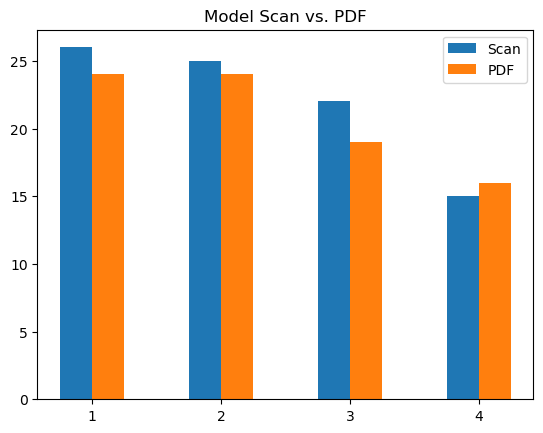

In [105]:
plt.title("Model Scan vs. PDF")
plt.xticks(range(1,5))
plt.hist([test_results_scan.Quota,test_results_pdf.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5,cumulative=-1)
plt.legend(["Scan","PDF"])
plt.show()

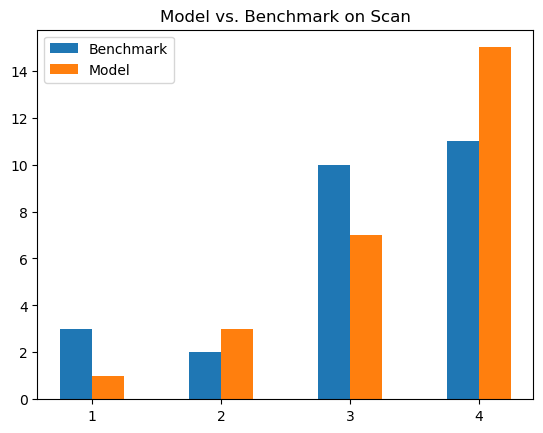

In [106]:
plt.title("Custom Model vs. Benchmark on Scan")
plt.xticks(range(1,5))
plt.hist([benchmark_scan.Quota,test_results_scan.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5)
plt.legend(["Benchmark","Custom Model"])
plt.show()

NameError: name 'benchmark_scan' is not defined

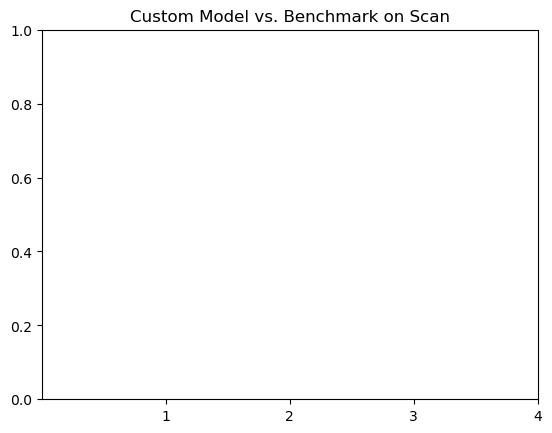

In [ ]:
plt.title("Custom Model vs. Benchmark on Scan")
plt.xticks(range(1,5))
plt.hist([benchmark_scan.Quota,test_results_scan.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5,cumulative=-1)
plt.legend(["Benchmark","Custom Model"])
plt.show()

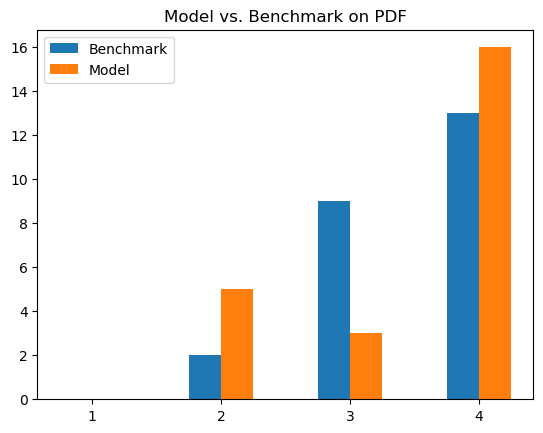

In [108]:
plt.title("Custom Model vs. Benchmark on PDF")
plt.xticks(range(1,5))
plt.hist([benchmark_pdf.Quota,test_results_pdf.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5)
plt.legend(["Benchmark","Custom Model"])
plt.show()

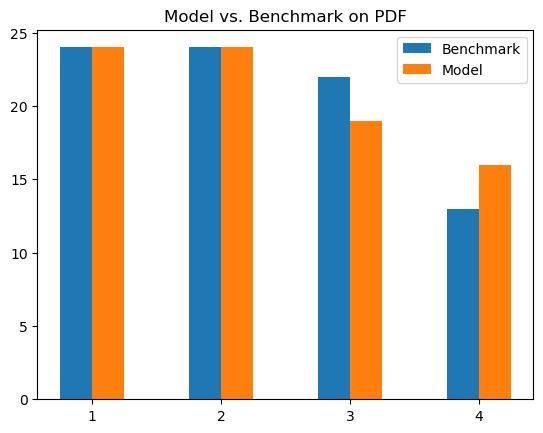

In [109]:
plt.title("Custom Model vs. Benchmark on PDF")
plt.xticks(range(1,5))
plt.hist([benchmark_pdf.Quota,test_results_pdf.Quota],bins=[1,2,3,4,5],align="left",rwidth=0.5,cumulative=-1)
plt.legend(["Benchmark","Custom Model"])
plt.show()

In [134]:
n = test_results_pdf.shape[0]
print("Model Performance")
vendor_acc = (test_results_pdf["Correct Vendor"].sum() / n) * 100
number_acc = (test_results_pdf["Correct Invoice Number"].sum() / n) * 100
amount_acc = (test_results_pdf["Correct Amount"].sum() / n) * 100
date_acc = (test_results_pdf["Correct Invoice Date"].sum() / n) * 100
print("PDF Accuracy:")
print(f"Vendor Accuracy: {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy: {number_acc:.2f} %")
print(f"Amount Accuracy: {amount_acc:.2f} %")
print(f"Invoice Date Accuracy: {date_acc:.2f} %")
n = test_results_scan.shape[0]
vendor_acc = (test_results_scan["Correct Vendor"].sum() / n) * 100
number_acc = (test_results_scan["Correct Invoice Number"].sum() / n) * 100
amount_acc = (test_results_scan["Correct Amount"].sum() / n) * 100
date_acc = (test_results_scan["Correct Invoice Date"].sum() / n) * 100
print("Scan Accuracy:")
print(f"Vendor Accuracy: {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy: {number_acc:.2f} %")
print(f"Amount Accuracy: {amount_acc:.2f} %")
print(f"Invoice Date Accuracy: {date_acc:.2f} %")

Model Performance
PDF Accuracy:
Vendor Accuracy: 79.17 %
Invoice Number Accuracy: 95.83 %
Amount Accuracy: 83.33 %
Invoice Date Accuracy: 87.50 %
Scan Accuracy:
Vendor Accuracy: 73.08 %
Invoice Number Accuracy: 80.77 %
Amount Accuracy: 92.31 %
Invoice Date Accuracy: 92.31 %


In [127]:
n = benchmark_pdf.shape[0]
print("Benchmark performance:")
vendor_acc = (benchmark_pdf["Correct Vendor"].sum() / n) * 100
number_acc = (benchmark_pdf["Correct Invoice Number"].sum() / n) * 100
amount_acc = (benchmark_pdf["Correct Amount"].sum() / n) * 100
date_acc = (benchmark_pdf["Correct Invoice Date"].sum() / n) * 100
print("PDF Accuracy:")
print(f"Vendor Accuracy: {vendor_acc} %")
print(f"Invoice Number Accuracy: {number_acc} %")
print(f"Amount Accuracy: {amount_acc} %")
print(f"Invoice Date Accuracy: {date_acc:.2f} %")
n = benchmark_scan.shape[0]
vendor_acc = (benchmark_scan["Correct Vendor"].sum() / n) * 100
number_acc = (benchmark_scan["Correct Invoice Number"].sum() / n) * 100
amount_acc = (benchmark_scan["Correct Amount"].sum() / n) * 100
date_acc = (benchmark_scan["Correct Invoice Date"].sum() / n) * 100
print("Scan Accuracy:")
print(f"Vendor Accuracy: {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy: {number_acc:.2f} %")
print(f"Amount Accuracy: {amount_acc:.2f} %")
print(f"Invoice Date Accuracy: {date_acc:.2f} %")

Benchmark performance:
PDF Accuracy:
Vendor Accuracy: 87.5 %
Invoice Number Accuracy: 87.5 %
Amount Accuracy: 87.5 %
Invoice Date Accuracy: 83.33 %
Scan Accuracy:
Vendor Accuracy: 65.38 %
Invoice Number Accuracy: 69.23 %
Amount Accuracy: 92.31 %
Invoice Date Accuracy: 84.62 %


In [128]:
n = len(test_results.index)
vendor_nan = test_results.loc[test_results["Correct Vendor"]==False,"Extracted Vendor"].value_counts().get("nan",0)
number_nan = test_results.loc[test_results["Correct Invoice Number"]==False,"Extracted Invoice Number"].value_counts().get("nan",0)
amount_nan = test_results.loc[test_results["Correct Amount"]==False,"Extracted Amount"].value_counts().get("nan",0)
date_nan = test_results["Extracted Invoice Date"].isna().sum()
vendor_acc = (test_results["Correct Vendor"].sum() / (n-vendor_nan)) * 100
number_acc = (test_results["Correct Invoice Number"].sum() / (n-number_nan)) * 100
amount_acc = (test_results["Correct Amount"].sum() / (n-amount_nan)) * 100
date_acc = (test_results["Correct Invoice Date"].sum() / (n-date_nan)) * 100
print("Test Set complete")
print(f"Vendor Null: {(vendor_nan/n)*100:.2f} %")
print(f"Invoice Number Null: {(number_nan/n)*100:.2f} %")
print(f"Amount Null: {(amount_nan/n)*100:.2f} %")
print(f"Invoice Date Null: {(date_nan/n)*100:.2f} %")
print(f"Vendor Accuracy (excluding Null): {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy (excluding Null): {number_acc:.2f} %")
print(f"Amount Accuracy (excluding Null): {amount_acc:.2f} %")
print(f"Invoice Date Accuracy (excluding Null): {date_acc:.2f} %")

Test Set complete
Vendor Null: 8.00 %
Invoice Number Null: 6.00 %
Amount Null: 6.00 %
Invoice Date Null: 8.00 %
Vendor Accuracy (excluding Null): 82.61 %
Invoice Number Accuracy (excluding Null): 93.62 %
Amount Accuracy (excluding Null): 93.62 %
Invoice Date Accuracy (excluding Null): 97.83 %


In [129]:
n = len(test_results_pdf.index)
vendor_nan = test_results_pdf.loc[test_results_pdf["Correct Vendor"]==False,"Extracted Vendor"].value_counts().get("nan",0)
number_nan = test_results_pdf.loc[test_results_pdf["Correct Invoice Number"]==False,"Extracted Invoice Number"].value_counts().get("nan",0)
amount_nan = test_results_pdf.loc[test_results_pdf["Correct Amount"]==False,"Extracted Amount"].value_counts().get("nan",0)
date_nan = test_results_pdf["Extracted Invoice Date"].isna().sum()
vendor_acc = (test_results_pdf["Correct Vendor"].sum() / (n-vendor_nan)) * 100
number_acc = (test_results_pdf["Correct Invoice Number"].sum() / (n-number_nan)) * 100
amount_acc = (test_results_pdf["Correct Amount"].sum() / (n-amount_nan)) * 100
date_acc = (test_results_pdf["Correct Invoice Date"].sum() / (n-date_nan)) * 100
print("Test Set PDF")
print(f"Vendor Null: {(vendor_nan/n)*100:.2f} %")
print(f"Invoice Number Null: {(number_nan/n)*100:.2f} %")
print(f"Amount Null: {(amount_nan/n)*100:.2f} %")
print(f"Invoice Date Null: {(date_nan/n)*100:.2f} %")
print(f"Vendor Accuracy (excluding Null): {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy (excluding Null): {number_acc:.2f} %")
print(f"Amount Accuracy (excluding Null): {amount_acc:.2f} %")
print(f"Invoice Date Accuracy (excluding Null): {date_acc:.2f} %")

Test Set PDF
Vendor Null: 12.50 %
Invoice Number Null: 4.17 %
Amount Null: 8.33 %
Invoice Date Null: 8.33 %
Vendor Accuracy (excluding Null): 90.48 %
Invoice Number Accuracy (excluding Null): 100.00 %
Amount Accuracy (excluding Null): 90.91 %
Invoice Date Accuracy (excluding Null): 95.45 %


In [130]:
n = len(test_results_scan.index)
vendor_nan = test_results_scan.loc[test_results_scan["Correct Vendor"]==False,"Extracted Vendor"].value_counts().get("nan",0)
number_nan = test_results_scan.loc[test_results_scan["Correct Invoice Number"]==False,"Extracted Invoice Number"].value_counts().get("nan",0)
amount_nan = test_results_scan.loc[test_results_scan["Correct Amount"]==False,"Extracted Amount"].value_counts().get("nan",0)
date_nan = test_results_scan["Extracted Invoice Date"].isna().sum()
vendor_acc = (test_results_scan["Correct Vendor"].sum() / (n-vendor_nan)) * 100
number_acc = (test_results_scan["Correct Invoice Number"].sum() / (n-number_nan)) * 100
amount_acc = (test_results_scan["Correct Amount"].sum() / (n-amount_nan)) * 100
date_acc = (test_results_scan["Correct Invoice Date"].sum() / (n-date_nan)) * 100
print("Test Set scan")
print(f"Vendor Null: {(vendor_nan/n)*100:.2f} %")
print(f"Invoice Number Null: {(number_nan/n)*100:.2f} %")
print(f"Amount Null: {(amount_nan/n)*100:.2f} %")
print(f"Invoice Date Null: {(date_nan/n)*100:.2f} %")
print(f"Vendor Accuracy (excluding Null): {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy (excluding Null): {number_acc:.2f} %")
print(f"Amount Accuracy (excluding Null): {amount_acc:.2f} %")
print(f"Invoice Date Accuracy (excluding Null): {date_acc:.2f} %")

Test Set scan
Vendor Null: 3.85 %
Invoice Number Null: 7.69 %
Amount Null: 3.85 %
Invoice Date Null: 7.69 %
Vendor Accuracy (excluding Null): 76.00 %
Invoice Number Accuracy (excluding Null): 87.50 %
Amount Accuracy (excluding Null): 96.00 %
Invoice Date Accuracy (excluding Null): 100.00 %


In [131]:
n = len(benchmark.index)
vendor_nan = benchmark.loc[benchmark["Correct Vendor"]==False,"Extracted Vendor"].value_counts().get("nan",0)
number_nan = benchmark.loc[benchmark["Correct Invoice Number"]==False,"Extracted Invoice Number"].value_counts().get("nan",0)
amount_nan = benchmark.loc[benchmark["Correct Amount"]==False,"Extracted Amount"].value_counts().get("nan",0)
date_nan = benchmark["Extracted Invoice Date"].isna().sum()
vendor_acc = (benchmark["Correct Vendor"].sum() / (n-vendor_nan)) * 100
number_acc = (benchmark["Correct Invoice Number"].sum() / (n-number_nan)) * 100
amount_acc = (benchmark["Correct Amount"].sum() / (n-amount_nan)) * 100
date_acc = (benchmark["Correct Invoice Date"].sum() / (n-date_nan)) * 100
print("Benchmark complete")
print(f"Vendor Null: {(vendor_nan/n)*100:.2f} %")
print(f"Invoice Number Null: {(number_nan/n)*100:.2f} %")
print(f"Amount Null: {(amount_nan/n)*100:.2f} %")
print(f"Invoice Date Null: {(date_nan/n)*100:.2f} %")
print(f"Vendor Accuracy (excluding Null): {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy (excluding Null): {number_acc:.2f} %")
print(f"Amount Accuracy (excluding Null): {amount_acc:.2f} %")
print(f"Invoice Date Accuracy (excluding Null): {date_acc:.2f} %")

Benchmark complete
Vendor Null: 12.00 %
Invoice Number Null: 22.00 %
Amount Null: 8.00 %
Invoice Date Null: 12.00 %
Vendor Accuracy (excluding Null): 86.36 %
Invoice Number Accuracy (excluding Null): 100.00 %
Amount Accuracy (excluding Null): 97.83 %
Invoice Date Accuracy (excluding Null): 95.45 %


In [132]:
n = len(benchmark_pdf.index)
vendor_nan = benchmark_pdf.loc[benchmark_pdf["Correct Vendor"]==False,"Extracted Vendor"].value_counts().get("nan",0)
number_nan = benchmark_pdf.loc[benchmark_pdf["Correct Invoice Number"]==False,"Extracted Invoice Number"].value_counts().get("nan",0)
amount_nan = benchmark_pdf.loc[benchmark_pdf["Correct Amount"]==False,"Extracted Amount"].value_counts().get("nan",0)
date_nan = benchmark_pdf["Extracted Invoice Date"].isna().sum()
vendor_acc = (benchmark_pdf["Correct Vendor"].sum() / (n-vendor_nan)) * 100
number_acc = (benchmark_pdf["Correct Invoice Number"].sum() / (n-number_nan)) * 100
amount_acc = (benchmark_pdf["Correct Amount"].sum() / (n-amount_nan)) * 100
date_acc = (benchmark_pdf["Correct Invoice Date"].sum() / (n-date_nan)) * 100
print("Benchmark PDF")
print(f"Vendor Null: {(vendor_nan/n)*100:.2f} %")
print(f"Invoice Number Null: {(number_nan/n)*100:.2f} %")
print(f"Amount Null: {(amount_nan/n)*100:.2f} %")
print(f"Invoice Date Null: {(date_nan/n)*100:.2f} %")
print(f"Vendor Accuracy (excluding Null): {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy (excluding Null): {number_acc:.2f} %")
print(f"Amount Accuracy (excluding Null): {amount_acc:.2f} %")
print(f"Invoice Date Accuracy (excluding Null): {date_acc:.2f} %")

Benchmark PDF
Vendor Null: 12.50 %
Invoice Number Null: 12.50 %
Amount Null: 12.50 %
Invoice Date Null: 12.50 %
Vendor Accuracy (excluding Null): 100.00 %
Invoice Number Accuracy (excluding Null): 100.00 %
Amount Accuracy (excluding Null): 100.00 %
Invoice Date Accuracy (excluding Null): 95.24 %


In [133]:
n = len(benchmark_scan.index)
vendor_nan = benchmark_scan.loc[benchmark_scan["Correct Vendor"]==False,"Extracted Vendor"].value_counts().get("nan",0)
number_nan = benchmark_scan.loc[benchmark_scan["Correct Invoice Number"]==False,"Extracted Invoice Number"].value_counts().get("nan",0)
amount_nan = benchmark_scan.loc[benchmark_scan["Correct Amount"]==False,"Extracted Amount"].value_counts().get("nan",0)
date_nan = benchmark_scan["Extracted Invoice Date"].isna().sum()
vendor_acc = (benchmark_scan["Correct Vendor"].sum() / (n-vendor_nan)) * 100
number_acc = (benchmark_scan["Correct Invoice Number"].sum() / (n-number_nan)) * 100
amount_acc = (benchmark_scan["Correct Amount"].sum() / (n-amount_nan)) * 100
date_acc = (benchmark_scan["Correct Invoice Date"].sum() / (n-date_nan)) * 100
print("Benchmark Scan")
print(f"Vendor Null: {(vendor_nan/n)*100:.2f} %")
print(f"Invoice Number Null: {(number_nan/n)*100:.2f} %")
print(f"Amount Null: {(amount_nan/n)*100:.2f} %")
print(f"Invoice Date Null: {(date_nan/n)*100:.2f} %")
print(f"Vendor Accuracy (excluding Null): {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy (excluding Null): {number_acc:.2f} %")
print(f"Amount Accuracy (excluding Null): {amount_acc:.2f} %")
print(f"Invoice Date Accuracy (excluding Null): {date_acc:.2f} %")

Benchmark Scan
Vendor Null: 11.54 %
Invoice Number Null: 30.77 %
Amount Null: 3.85 %
Invoice Date Null: 11.54 %
Vendor Accuracy (excluding Null): 73.91 %
Invoice Number Accuracy (excluding Null): 100.00 %
Amount Accuracy (excluding Null): 96.00 %
Invoice Date Accuracy (excluding Null): 95.65 %
